<a href="https://colab.research.google.com/github/arzucivelekoglu/basic-opencv-subjects/blob/main/7_Convolutions_Blurring_and_Sharpening_Imagesled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Convolutions, Blurring and Sharpening Images**

## **Blurring using Convolutions**

İlk olarak 2 boyutlu bir kernel kullanarak bulanıklaştırma işlemleri yapacağız.

Kernel'i görüntüde kullanmak için OpenCV'nin `filter2D` fonksiyonunu kullanıyoruz.



```
cv2.filter2D(src, ddepth, kernel)
```



* **src :** Filtreleyicinin uygulanacağı kaynak görüntü. 

* **ddepth :** Hedef görüntünün arzu edilen derinliğidir . -1 değeri, elde edilen görüntünün kaynak görüntü ile aynı derinliğe sahip olacağını gösterir.

* **kernel :** kernel, görüntüye uygulanan filtre matrisidir.



In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("/content/bird.webp")

# 3x3'lük bir kernel oluşturuyoruz
kerne_3x3 = np.ones((3,3), np.float32)/9
# kernelimizi görüntüye uyguluyoruz
blurred =  cv2.filter2D(image, -1, kerne_3x3)

# 7x7'lik bir kernel oluşturuyoruz
kernel_7x7 = np.ones((7, 7), np.float32) / 49
blurred2 = cv2.filter2D(image, -1, kernel_7x7)


Text(0.5, 1.0, '7x7 Kernel Blurring')

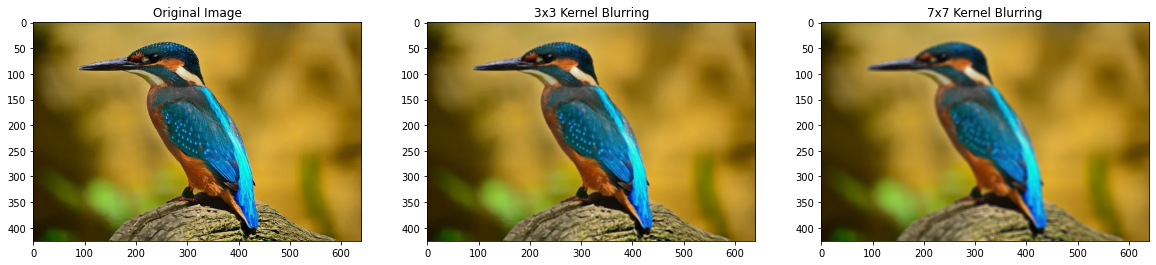

In [31]:
fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 3, 1) 
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

fig.add_subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
plt.title("3x3 Kernel Blurring")

fig.add_subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(blurred2, cv2.COLOR_BGR2RGB))
plt.title("7x7 Kernel Blurring")



## **Other commonly used blurring methods in OpenCV**

* Simple blurring `(cv2.blur)`

* Weighted Gaussian blurring `(cv2.GaussianBlur)`

* Median filtering `(cv2.medianBlur)`

* Bilateral blurring `(cv2.bilateralFilter)`

*Kenar algılama veya eşikleme gibi teknikleri uygulamadan önce bir görüntüyü yumuşatarak , gürültü ve kenarlar (yani, bir görüntünün "ayrıntısı") gibi yüksek frekanslı içeriğin miktarını azaltabiliriz.*

*Ayrıca bu, görüntüdeki daha büyük yapısal nesnelere odaklanmamızı sağlar.*

### **Average blurring `( cv2.blur )`**

Average blurring, merkezi bir pikseli çevreleyen piksellerden oluşan bir alanı alır, tüm bu piksellerin ortalamasını alır ve merkezi pikseli ortalamayla değiştirir.

Bir pikseli çevreleyen bölgenin ortalamasını alarak onu yumuşatıyor ve yerel komşuluk değeriyle değiştiriyoruz. Bu, yalnızca ortalamaya güvenerek gürültüyü ve ayrıntı düzeyini azaltmamızı sağlar.

Text(0.5, 1.0, '7x7 Kernel Blurring')

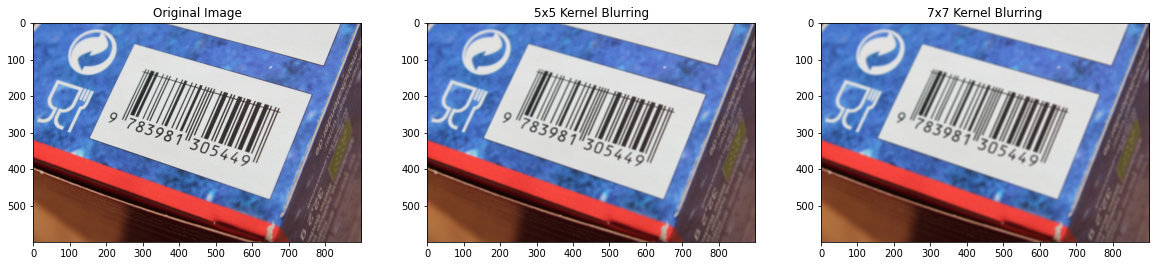

In [48]:
image = cv2.imread("/content/borcode.png")


blur1 = cv2.blur(image, (5,5))
blur2= cv2.blur(image, (7,7))


fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 3, 1) 
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

fig.add_subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(blur1, cv2.COLOR_BGR2RGB))
plt.title("5x5 Kernel Blurring")

fig.add_subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(blur2, cv2.COLOR_BGR2RGB))
plt.title("7x7 Kernel Blurring")



### **Gaussian blurring ( cv2.GaussianBlur)**

Gauss bulanıklığı , ortalama bulanıklığa benzer, ancak basit bir ortalama kullanmak yerine, artık merkezi piksele daha yakın olan komşu piksellerin ortalamaya daha fazla "ağırlık" kattığı ağırlıklı bir ortalama kullanıyoruz.

Ve adından da anlaşılacağı gibi, Gauss yumuşatma, yaklaşık olarak bir Gauss dağılımını izleyen gürültüyü gidermek için kullanılır.


Text(0.5, 1.0, '7x7 Gaussian blurring')

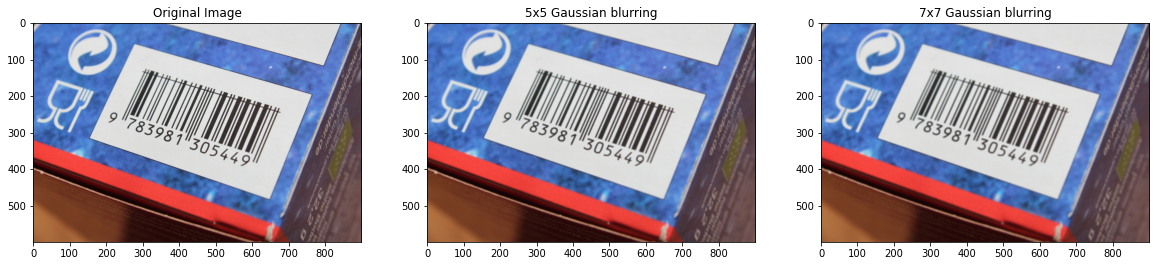

In [50]:
Gaussian1 = cv2.GaussianBlur(image, (5,5), 0)
Gaussian2 = cv2.GaussianBlur(image, (7,7), 0)

fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 3, 1) 
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

fig.add_subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(Gaussian1, cv2.COLOR_BGR2RGB))
plt.title("5x5 Gaussian blurring")

fig.add_subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(Gaussian2, cv2.COLOR_BGR2RGB))
plt.title("7x7 Gaussian blurring")


### **Median blurring ( cv2.medianBlur )**

Geleneksel olarak, medyan bulanıklaştırma yöntemi tuz ve biber gürültüsünü ortadan kaldırırken en etkili olmuştur. Bu tür bir gürültü tam olarak kulağa benziyor: bir fotoğraf çektiğinizi, onu yemek masanızın üzerine koyduğunuzu ve üzerine tuz ve karabiber serptiğinizi hayal edin. Medyan bulanıklaştırma yöntemini kullanarak görüntünüzdeki tuzu ve biberi kaldırabilirsiniz.

Medyan bulanıklaştırmanın bir görüntüden tuz ve biber tarzı gürültüyü gidermede daha etkili olmasının nedeni, her merkezi pikselin her zaman görüntüde var olan bir piksel yoğunluğuyla değiştirilmesidir. Ve medyan, aykırı değerlere karşı sağlam olduğundan, tuzlu ve biberli gürültü medyan üzerinde, ortalama gibi başka bir istatistiksel yöntemden daha az etkili olacaktır.

*Çekirdek boyutunun dikdörtgen olabileceği ortalama bulanıklaştırma ve Gauss bulanıklığının aksine , medyan için çekirdek boyutunun kare olması gerektiğine dikkat edin .*

Text(0.5, 1.0, '7x7 Median blurring')

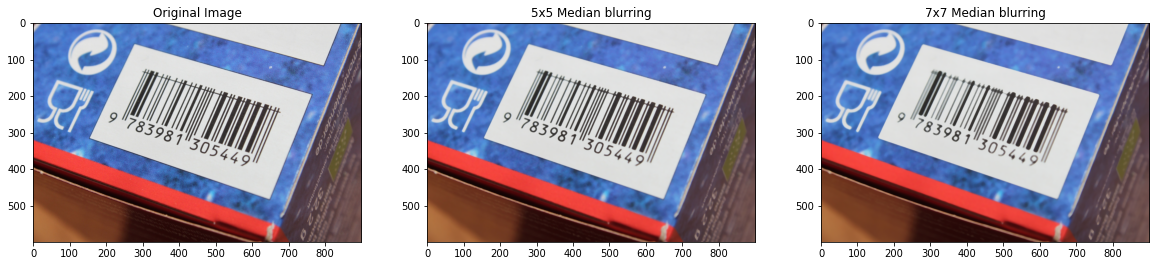

In [51]:
median1 = cv2.medianBlur(image, 5)
median2 = cv2.medianBlur(image, 7)

fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 3, 1) 
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

fig.add_subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(median1, cv2.COLOR_BGR2RGB))
plt.title("5x5 Median blurring")

fig.add_subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(median2, cv2.COLOR_BGR2RGB))
plt.title("7x7 Median blurring")


## **Bilateral Filter**

Şimdiye kadar, bulanıklaştırma yöntemlerimizin amacı bir görüntüdeki paraziti ve ayrıntıyı azaltmaktı; ancak, bir yan etki olarak görüntüdeki kenarları kaybetme eğiliminde olduk.

Kenarları korurken gürültüyü azaltmak için ikili bulanıklaştırmayı kullanabiliriz. İkili bulanıklaştırma, bunu iki Gauss dağılımı sunarak başarır.

```
dst = cv.bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]])
```
- **src :**	kaynak görüntü

- **d :**	piksel komşuluğumuzun çapını tanımlamamız gerekir. Bu çap ne kadar büyükse, bulanıklaştırma hesaplamasına o kadar çok piksel dahil edilir. Bu parametreyi kare çekirdek boyutu olarak düşünün.

- **sigmaColor :** sigma Renk uzayındaki değeri. Değer ne kadar büyük olursa, birbirine uzak olan renkler karışmaya başlar.

- **sigmaSpace :**sigma Koordinat uzayındaki değeri. Değeri ne kadar büyük olursa, renklerinin sigmaColor aralığında olması şartıyla, daha fazla piksel birbirine karışacaktır.


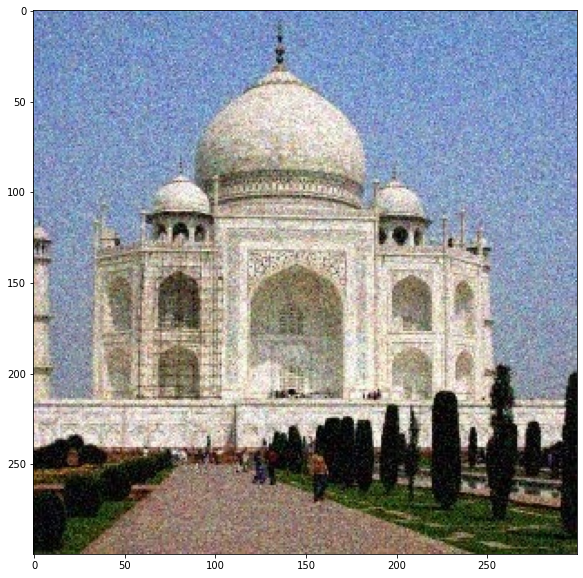

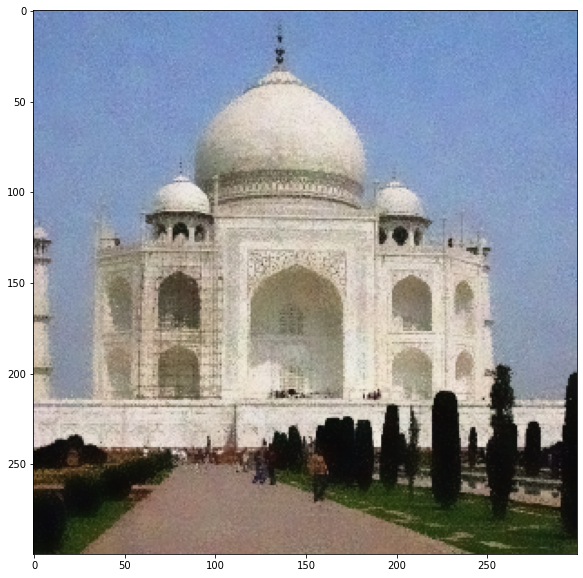

In [69]:
image = cv2.imread("/content/taj.jpg")

biletarel = cv2.bilateralFilter(image, 15, 75,75)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(biletarel, cv2.COLOR_BGR2RGB))
plt.show()

⚡ Yukarıda gördüğümüz tüm bulanıklaştırma işlemlerini toplu hali aşağıdaki gibidir : 

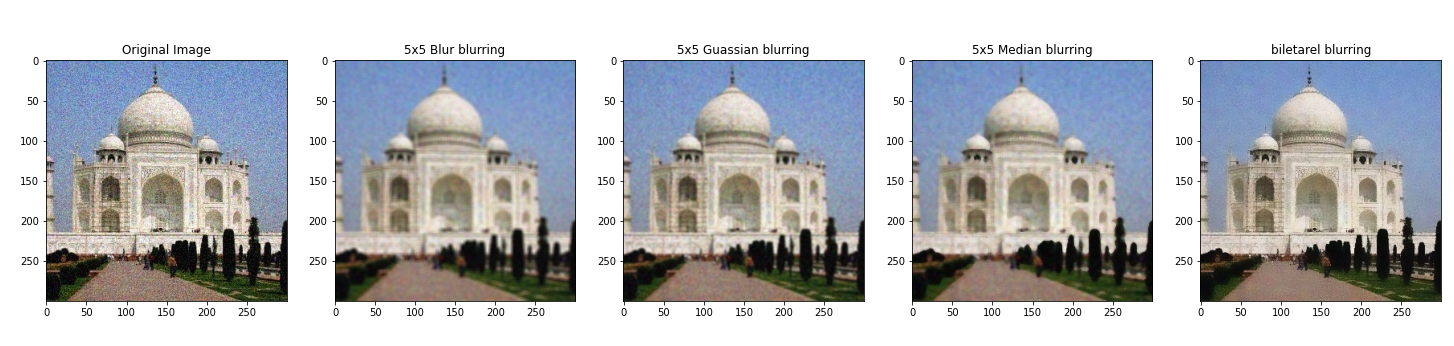

## **Image De-noising - Non-Local Means Denoising**

**There are 4 variations of Non-Local Means Denoising:**

- **cv2.fastNlMeansDenoising()** - tek gri tonlamalı görüntülerle çalışır
- **cv2.fastNlMeansDenoisingColored()** - renkli bir görüntü ile çalışır.
- **cv2.fastNlMeansDenoisingMulti()** - kısa sürede yakalanan görüntü sekansıyla çalışır (gri tonlamalı görüntüler)
- **cv2.fastNlMeansDenoisingColoredMulti()** - yukarıdakiyle aynı, ancak renkli görüntüler için.



```
cv2.fastNlMeansDenoisingColored( P1, P2, float P3, float P4, int P5, int P6)
```
Parametreler:

* P1 – Kaynak Görüntü Dizisi
* P2 – Hedef Görüntü Dizisi
* P3 – Ağırlıkları hesaplamak için kullanılan şablon yamasının piksel cinsinden boyutu.
* P4 – Verilen piksel için ağırlıklı ortalamayı hesaplamak için kullanılan pencerenin piksel cinsinden boyutu.
* P5 – Parlaklık bileşeni için filtre gücünü düzenleyen parametre.
* P6 – Yukarıdakiyle aynı, ancak renkli bileşenler için // Gri tonlamalı bir görüntüde kullanılmaz.

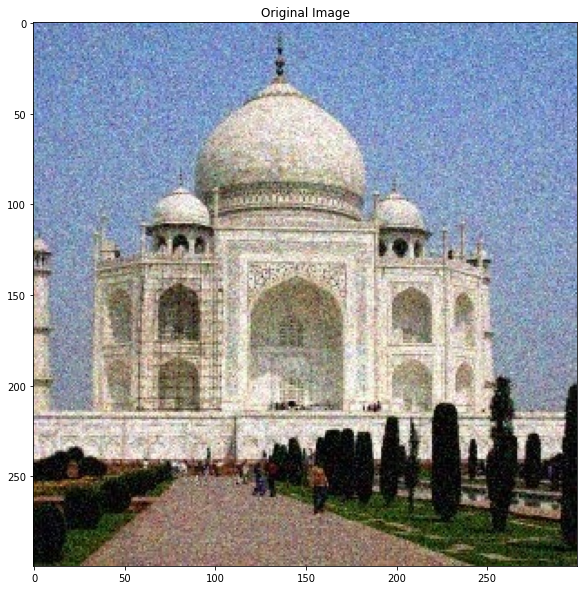

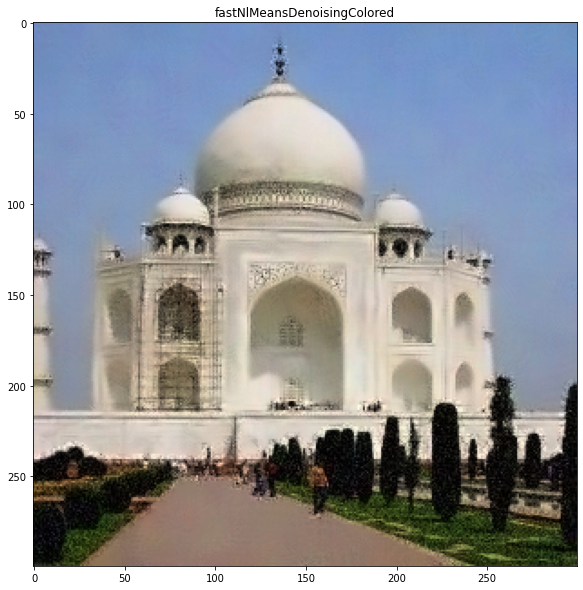

In [78]:
image = cv2.imread("/content/taj.jpg")

#dst = cv2.fastNlMeansDenoisingColored(image, None, 6, 6, 7, 21)
dst = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 15)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title("fastNlMeansDenoisingColored")
plt.show()

## **Sharpening Images**

Bulanık bir görüntü üzerinde keskinleştirme yapma.


Text(0.5, 1.0, 'Sharpening')

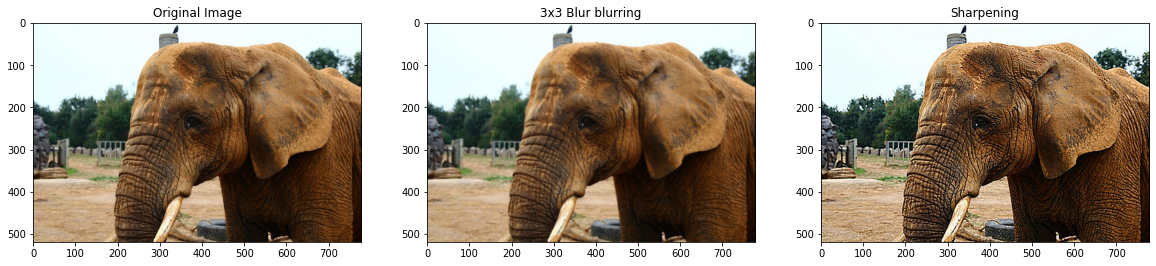

In [91]:
image = cv2.imread("/content/elephant.jpg")

blur = cv2.blur(image, (3,3))

# toplamları bir olacak şekilde bir matris oluşturuyoruz
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])

# filtremizi görüntüye filter2D ile veriyoruz
sharpened = cv2.filter2D(blur, -1, kernel_sharpening)


fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 3, 1) 
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

fig.add_subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.title("3x3 Blur blurring")

fig.add_subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB))
plt.title("Sharpening")
